In [10]:
import json, re,  os, time, random , requests
from bs4 import BeautifulSoup  
import nltk
from nltk.corpus import stopwords
sw=stopwords.words('english')
import pandas as pd 
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.options import Options
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC 
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
def get_his(): 
 
    bs = BeautifulSoup(requests.get(f"https://www.trulia.com/p/dc/washington/535-10th-st-se-washington-dc-20003--2090274892").text, "html.parser")  
    ele = bs.select('.lomxvq') 
    dfhis = pd.read_html(f'{ele[17]}')[0]
    dfhis['event'] = dfhis['Event Details']
    dfhis = dfhis[['event']]
    s=''
    for e in dfhis.event:
        s=s + re.sub(r'(/\d{4})',r'\1,', e) + ',\n'
    return s
print( get_his() )

09/29/2021,PendingBright MLS #DCDC2002270,
09/21/2021,PriceChangeBright MLS #DCDC2002270,
08/24/2021,PriceChangeBright MLS #DCDC2002270,
07/27/2021,PriceChangeBright MLS #DCDC2002270,
07/01/2021,Listed For SaleBright MLS #DCDC2002270,
10/27/2020,SoldPublic Records,



In [99]:
lor = 27.5
value = 8000
ann_dep = round((value / 27.5),2) 
half_dep = ann_dep * .5
s = '' 
s = s + f'Address:,535 10th Street Southeast Washington DC 20003,\n'  
s = s + f'MLS:,DCDC2002270,\n' 
s = s + f'Property History:,,\n'  
s = s + f'------------------------,,\n'  
s = s + f'Jul 1 2021,  Listed (Active) BRIGHT #DCDC2002270,\n'	
s = s + f'Oct 27 2020, Closed Public Record #681561466,\n'
s = s + f'------------------------,,\n'  
s = s + f'Life of Roof:, {lor} years, (IRS pub.527 Depreciation)\n'  
s = s + f'Roof Value:, ${value}, \n'
s = s + f'Annual Depreciation, ${ann_dep}, ({value} / 27.5) \n'  
s = s + f'------------------------,,\n'  
s = s + f'Amortized,, \n'  
s = s + f'------------------------,,\n'  

bi_ann_dep = round(ann_dep * .5 , 2)  
for i in range(1, 27): 
    val = round(i * ann_dep, 2) 
    val_5 = round(bi_ann_dep+ val, 2) 
    per = round(val/value, 2) * 100
    per_5 = round(val_5/value, 2) * 100
    s = s + f'Year { i }.0 ,${ val }, {round(per, 2)}% \n'  
    s = s + f'Year { i }.5 ,${ val_5 }, {round(per_5, 2)}% \n'  
 
s = s + f'Year 27.0, $7854.57, 98.0% \n'  
s = s + f'Year 27.5, $8000.0, 100.0% \n'  

print( s )
with open("C:\\Users\\timko\\Documents\\House\\535\\roof\\RoofCostAmortized.txt", "w") as f:
    f.write(f"{ s }\n")
with open("C:\\Users\\timko\\Documents\\House\\535\\roof\\RoofCostAmortized.csv", "w") as f: 
    f.write(f"{ s }\n")

Address:,535 10th Street Southeast Washington DC 20003,
MLS:,DCDC2002270,
Property History:,,
------------------------,,
Jul 1 2021,  Listed (Active) BRIGHT #DCDC2002270,
Oct 27 2020, Closed Public Record #681561466,
------------------------,,
Life of Roof:, 27.5 years, (IRS pub.527 Depreciation)
Roof Value:, $8000, 
Annual Depreciation, $290.91, (8000 / 27.5) 
------------------------,,
Amortized,, 
------------------------,,
Year 1.0 ,$290.91, 4.0% 
Year 1.5 ,$436.37, 5.0% 
Year 2.0 ,$581.82, 7.0% 
Year 2.5 ,$727.28, 9.0% 
Year 3.0 ,$872.73, 11.0% 
Year 3.5 ,$1018.19, 13.0% 
Year 4.0 ,$1163.64, 15.0% 
Year 4.5 ,$1309.1, 16.0% 
Year 5.0 ,$1454.55, 18.0% 
Year 5.5 ,$1600.01, 20.0% 
Year 6.0 ,$1745.46, 22.0% 
Year 6.5 ,$1890.92, 24.0% 
Year 7.0 ,$2036.37, 25.0% 
Year 7.5 ,$2181.83, 27.0% 
Year 8.0 ,$2327.28, 29.0% 
Year 8.5 ,$2472.74, 31.0% 
Year 9.0 ,$2618.19, 33.0% 
Year 9.5 ,$2763.65, 35.0% 
Year 10.0 ,$2909.1, 36.0% 
Year 10.5 ,$3054.56, 38.0% 
Year 11.0 ,$3200.01, 40.0% 
Year 11.5 

<AxesSubplot:xlabel='year', ylabel='val'>

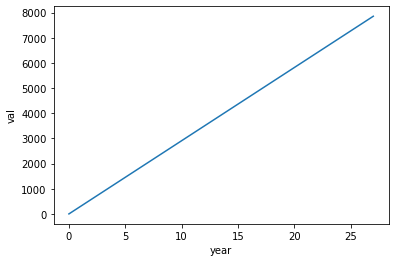

In [ ]:
plt.savefig('save_as_a_png.png')

In [4]:
options = Options()
options.add_argument("--start-minimized")

In [16]:

driver = webdriver.Chrome(executable_path=ChromeDriverManager().install() ,chrome_options=options) 
driver.get("") 
stat = driver.find_element(By.XPATH, '//*[contains(@class, "statistics")]')
who = driver.find_element(By.XPATH, '//*[contains(@class, "online-list")]')
try:
    now = datetime.now()
    dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
    stats = f'[{dt_string}] {who.text} {stat.text}\n' 
except Exception as e:
    print(e)
finally: 
    driver.quit()

with open("out.txt", "a") as f:
    f.write(f"{ stats }\n")
with open("out.txt", "r") as f:
    print ( f.read() ) 



====== WebDriver manager ======
Current google-chrome version is 94.0.4606
Get LATEST driver version for 94.0.4606
Driver [C:\Users\timko\.wdm\drivers\chromedriver\win32\94.0.4606.61\chromedriver.exe] found in cache
<ipython-input-16-db8d438452e0>:1: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(executable_path=ChromeDriverManager().install() ,chrome_options=options)




[07/10/2021 11:19:59] Who is online
In total there are 2 users online :: 2 registered and 0 hidden (based on users active over the past 15 minutes)
Most users ever online was 14 on Wed Nov 21, 2018 10:23 am Statistics
Total posts 184062 • Total topics 3132 • Total members 55 • Our newest member LilAnnyCat.




In [3]:
base = "https://washingtondc.craigslist.org/search/doc/sub?hasPic=1&bundleDuplicates=1&availabilityMode=0&rent_period=2&rent_period=3&sale_date=all+dates"
 

In [4]:
driver = webdriver.Chrome(executable_path=ChromeDriverManager().install() ,chrome_options=options) 
driver.get(base) 
# driver.find_element(By.XPATH, '//div[contains(@id, "piv-box")]//a').click()  
# driver.implicitly_wait(2)
# driver.switch_to.alert.accept() 



====== WebDriver manager ======
Current google-chrome version is 93.0.4577
Get LATEST driver version for 93.0.4577
There is no [win32] chromedriver for browser 93.0.4577 in cache
Get LATEST driver version for 93.0.4577
Trying to download new driver from https://chromedriver.storage.googleapis.com/93.0.4577.63/chromedriver_win32.zip
Driver has been saved in cache [C:\Users\timko\.wdm\drivers\chromedriver\win32\93.0.4577.63]
<ipython-input-4-ae2a423823cd>:1: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(executable_path=ChromeDriverManager().install() ,chrome_options=options)


In [3]:
driver = webdriver.Chrome(executable_path=ChromeDriverManager().install() ,chrome_options=options) 
driver.get(base)
driver.execute_script( 'window.open();')   
driver.switch_to_window(driver.window_handles[ len(driver.window_handles)-1])
driver.get(base)
driver.find_element(By.XPATH, '//div[contains(@class, "open-map-view-button")]').click() 



====== WebDriver manager ======
Current google-chrome version is 93.0.4577
Get LATEST driver version for 93.0.4577
There is no [win32] chromedriver for browser 93.0.4577 in cache
Get LATEST driver version for 93.0.4577
Trying to download new driver from https://chromedriver.storage.googleapis.com/93.0.4577.15/chromedriver_win32.zip
Driver has been saved in cache [C:\Users\timko\.wdm\drivers\chromedriver\win32\93.0.4577.15]
<ipython-input-3-9b4a52df6f05>:1: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(executable_path=ChromeDriverManager().install() ,chrome_options=options)
<ipython-input-3-9b4a52df6f05>:4: DeprecationWarning: use driver.switch_to.window instead
  driver.switch_to_window(driver.window_handles[ len(driver.window_handles)-1])
